<a href="https://colab.research.google.com/github/Shivaacharya138/Linear-Regression/blob/main/Linear_regression_boat_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('boat_data.csv')

In [3]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [4]:
df.tail()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
9883,CHF 4900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116
9884,EUR 4516,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94
9885,EUR 4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354
9886,EUR 4300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266
9887,CHF 3780,Fishing Boat,DarekCo power boats,new boat from stock,2019,3.60,1.60,GRP,Switzerland Â» Brienzersee Â» Brienz,194


In [5]:
df.shape

(9888, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [7]:
df.head(2)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.0,1.9,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.0,1.5,Thermoplastic,Germany Â» BÃ¶nningstedt,75


In [8]:
df[['currency','price1']]=df['Price'].str.split(' ',1, expand = True)

<ipython-input-8-83d2d98116c1>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['currency','price1']]=df['Price'].str.split(' ',1, expand = True)


In [9]:
df['currency']

0       CHF
1       EUR
2       CHF
3       DKK
4       EUR
       ... 
9883    CHF
9884    EUR
9885    EUR
9886    EUR
9887    CHF
Name: currency, Length: 9888, dtype: object

In [10]:
df['price1']

0        3337
1        3490
2        3770
3       25900
4        3399
        ...  
9883     4900
9884     4516
9885     4499
9886     4300
9887     3780
Name: price1, Length: 9888, dtype: object

In [11]:
df['price1'].astype(int)

0        3337
1        3490
2        3770
3       25900
4        3399
        ...  
9883     4900
9884     4516
9885     4499
9886     4300
9887     3780
Name: price1, Length: 9888, dtype: int64

In [12]:
df['currency'].unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [13]:
def price_USD(price, currency):
  if currency == 'CHF':
    return int(price)*1.12
  elif currency == 'EUR':
    return int(price)*1.10
  elif currency == 'DKK':
    return int(price)*0.15
  elif currency == 'Â£':
    return int(price)*1.25

In [14]:
df['Price_$'] = df.apply(lambda x : price_USD(x.price1, x.currency), axis=1)

In [15]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,price1,Price_$
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337,3737.44
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,3839.00
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,4222.40
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900,3885.00
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,3738.90


In [16]:
df.drop(['Price', 'currency','price1'], axis=1, inplace = True)

In [17]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price_$
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3737.44
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3839.00
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,4222.40
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3885.00
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3738.90


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    9888 non-null   object 
 1   Manufacturer                 8550 non-null   object 
 2   Type                         9882 non-null   object 
 3   Year Built                   9888 non-null   int64  
 4   Length                       9879 non-null   float64
 5   Width                        9832 non-null   float64
 6   Material                     8139 non-null   object 
 7   Location                     9852 non-null   object 
 8   Number of views last 7 days  9888 non-null   int64  
 9   Price_$                      9888 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 772.6+ KB


In [19]:
df.isna().sum()

Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
Price_$                           0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
Price_$                        0
dtype: int64

In [22]:
data_int = df.select_dtypes('int')
data_int.head()

,Year Built,Number of views last 7 days
1,2020,75
2,0,124
4,2019,58
5,0,132
10,1987,239


In [23]:
data_float = df.select_dtypes('float')
data_float.head()

,Length,Width,Price_$
1,4.00,1.50,3839.0
2,3.69,1.42,4222.4
4,3.55,1.46,3738.9
5,4.03,1.56,4088.0
10,4.35,1.75,3920.0


In [24]:
data_object = df.select_dtypes('object')
data_object.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Material', 'Location'], dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [28]:
df['Boat Type']=lr.fit_transform(df['Boat Type'])
df['Manufacturer'] = lr.fit_transform(df['Manufacturer'])
df['Type'] = lr.fit_transform(df['Type'])
df['Material'] = lr.fit_transform(df['Material'])

In [37]:
df['Location']=lr.fit_transform(df['Location'])

In [38]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price_$
1,36,719,14,2020,4.00,1.50,8,790,75,3839.0
2,99,444,14,0,3.69,1.42,0,2099,124,4222.4
4,62,410,14,2019,3.55,1.46,0,711,58,3738.9
5,99,410,14,0,4.03,1.56,0,2004,132,4088.0
10,62,719,10,1987,4.35,1.75,2,2194,239,3920.0


In [39]:
import seaborn as sns

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7019 entries, 1 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    7019 non-null   int64  
 1   Manufacturer                 7019 non-null   int64  
 2   Type                         7019 non-null   int64  
 3   Year Built                   7019 non-null   int64  
 4   Length                       7019 non-null   float64
 5   Width                        7019 non-null   float64
 6   Material                     7019 non-null   int64  
 7   Location                     7019 non-null   int64  
 8   Number of views last 7 days  7019 non-null   int64  
 9   Price_$                      7019 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 603.2 KB


<Axes: >

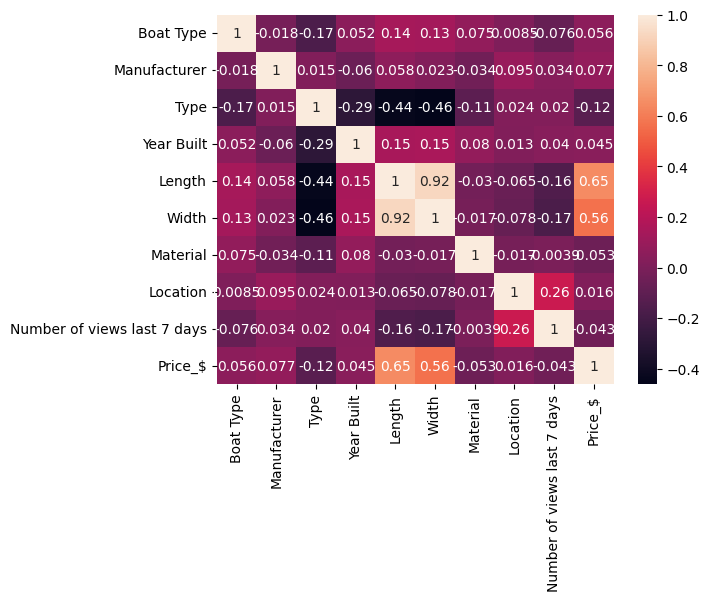

In [41]:
sns.heatmap(df.corr(), annot=True)

<ipython-input-42-3eb4b0d95c25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_$'])


<Axes: xlabel='Price_$', ylabel='Density'>

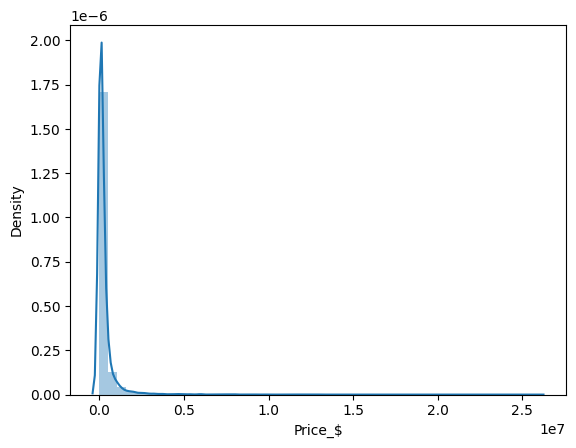

In [42]:
sns.distplot(df['Price_$'])

In [43]:
X = df.drop(['Price_$'], axis=1)
y = df['Price_$']

In [44]:
X

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
1,36,719,14,2020,4.00,1.50,8,790,75
2,99,444,14,0,3.69,1.42,0,2099,124
4,62,410,14,2019,3.55,1.46,0,711,58
5,99,410,14,0,4.03,1.56,0,2004,132
10,62,719,10,1987,4.35,1.75,2,2194,239
...,...,...,...,...,...,...,...,...,...
9880,99,410,14,0,4.01,1.64,0,2004,247
9881,99,444,14,0,3.99,1.52,0,2099,150
9882,62,679,13,1984,6.00,1.62,5,1888,288
9885,99,112,19,2020,4.40,1.80,2,1018,354


In [45]:
y

1       3839.0
2       4222.4
4       3738.9
5       4088.0
10      3920.0
         ...  
9880    5577.6
9881    5544.0
9882    5544.0
9885    4948.9
9887    4233.6
Name: Price_$, Length: 7019, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [49]:
LinReg.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = LinReg.predict(X_test)

In [51]:
y_pred

array([1023291.10528689,  -50340.67133197,  422431.70416848, ...,
         55006.89466762,  434222.41843634,   57638.216604  ])

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.39873771491718146

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

549980216980.6982

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

260047.12345116067